<a href="https://colab.research.google.com/github/dannyjammooa/PHY-989-Final-Project/blob/main/LM_excited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

In [ ]:
import numpy as np
import cmath
import numpy.linalg as LA
from scipy.sparse import diags
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def eigen(A):
    eigenValues, eigenVectors = LA.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return (eigenValues, eigenVectors) 

def one_body(E,N):
  k = N/2
  m = np.arange(-k,k+1,1)
  return E*np.diag(m)

def two_body(V,N):
  k = N/2
  m = np.arange(-k,k+1,1)
  #m = np.arange(-5,k+1,1)
  left =np.zeros(len(m)-2,dtype=complex)
  right = np.zeros(len(m)-2,dtype=complex)
  diag = np.zeros(len(m),dtype=complex)
  for i in range(len(left)):
    CG = cmath.sqrt(k*(k+1)-(m[i]+2)*(m[i]+1))*cmath.sqrt(k*(k+1)-m[i]*(m[i]+1))
    left[i] = CG
    right[i] = CG
  k = [left,diag,right]
  offset = [-2,0,2]
  return -0.5*V*diags(k,offset).toarray()

def quasi_spin(E,V,N):
  ob = one_body(E,N)
  tb = two_body(V,N)
  H = ob+tb 
  e,v = eigen(H)
  return e,H

def Vp(E,omega,chi):
  return (chi*E)/(omega-1)

In [ ]:
#parameters
E = 1
chi = np.arange(0,2.1,0.1)
N = 6

EV0 = []
EV1 = []
EV2 = []
EV3 = []
EV4 = []
EV5 = []
EV6 = []
for i in chi:
  v = Vp(E,N,i)
  EigenV,H = quasi_spin(E,v,N)
  EV0.append(EigenV[0])
  EV1.append(EigenV[1])
  EV2.append(EigenV[2])
  EV3.append(EigenV[3])
  EV4.append(EigenV[4])
  EV5.append(EigenV[5])
  EV6.append(EigenV[6])

In [ ]:
print('E=1,V=0.1,Omega=12,N=12')
print('Eigenvalues=')
print(EigenV.real)

E=1,V=0.1,Omega=12,N=12
Eigenvalues=
[-8.32111764e+00 -8.00000000e+00 -2.59980793e+00 -7.34030822e-16
  2.59980793e+00  8.00000000e+00  8.32111764e+00]


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex

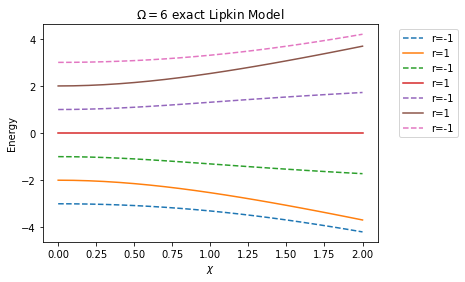

In [ ]:
plt.plot(chi,EV0,'--',label='r=-1')
plt.plot(chi,EV1,label='r=1')
plt.plot(chi,EV2,'--',label='r=-1')
plt.plot(chi,EV3,label='r=1')
plt.plot(chi,EV4,'--',label='r=-1')
plt.plot(chi,EV5,label='r=1')
plt.plot(chi,EV6,'--',label='r=-1')
plt.xlabel('$\chi$')
plt.ylabel('Energy')
plt.title('$\Omega=6$ exact Lipkin Model')
plt.legend(bbox_to_anchor=(1.05, 1))